# Interview questions with pandasql - Discovering 💻


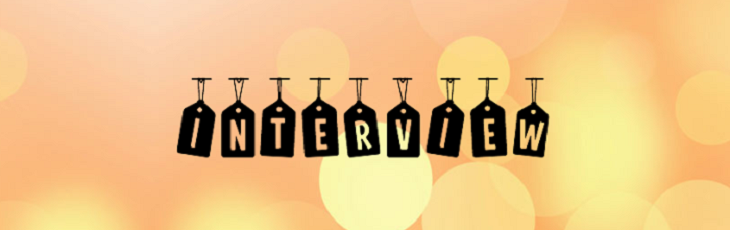

During the recruitment process we need to do an assessment which in most of data science jobs is based on coding. Some companies decide to challenge you with a quick analysis and, from my point of view, it is not the best option in order to know if one candidate is good enough for the position. Mainly, because when you solve a data problem you need to take your time.


Probably, the first steps can be to display some insights about the dataset provided. You should use your best tool to solve it, but, in this notebook I am going to show you which I think is the best tool. This tool is **pandasql**.

**pandasql** allows you to use SQL syntax in your pandas DataFrame. It is something amazing! 
Not only is it a good library to break the time-record in your interview but it also is an excellent tool to get value of your dataset or even to create a new dataset with some special features. Apart from showing the company that you know how to extract value of data, you are showing them your SQL skills which are essential in any data science job.


 I have spoken a lot, so.. Let's work! 💼

In [ ]:
#Import libraries

import pandas as pd
import pandasql as psql

In [ ]:
#Read the data

data = pd.read_csv('../input/videogamesales/vgsales.csv')
data.head(10)

In [ ]:
                                #Some information about the data

data.info()

data['Platform'].value_counts() #Plataform

data.Genre.unique() #Genre

data['Publisher'].value_counts() #Publisher

data['Global_Sales'].describe() #Global_Sales

 ## 1- How many PS4 sales are in each region?

In [ ]:
query1 = psql.sqldf("""
                    SELECT SUM(JP_Sales) AS Num_JPN_Sales,
                    SUM(EU_Sales) AS Num_EU_Sales,
                    SUM(NA_Sales) AS Num_NA_Sales FROM data
                    WHERE Platform = 'PS4' 
                    
                    """)
query1.head()

## 2- Which are the three best games sold in North America?

In [ ]:
query2 = psql.sqldf("""
                    SELECT Name AS Game, NA_Sales  FROM data
                    GROUP BY Name
                    ORDER BY NA_Sales DESC
                    LIMIT 3
                    
                    """)
query2.head()

## 3- Which are the year, the game and the genre with the most sales?

In [ ]:
query3 = psql.sqldf("""
                    SELECT Global_Sales, Year, Genre, Name  FROM data
                    GROUP BY Genre
                    ORDER BY Global_sales DESC
                    LIMIT 5
                    
                    """)
query3.head()

## 4- We want to study just the Adventure games in the year 2015

In [ ]:
query4 = psql.sqldf("""
                    SELECT * FROM data
                    WHERE Genre = 'Adventure' AND Year = 2015
                    GROUP BY Name
                    
                    """)
query4.head()

## 5- Display the number of shooter games with more than 1.3 sales in Europe

In [ ]:
query5 = psql.sqldf("""
                    SELECT COUNT(DISTINCT(Name)) AS num_Games FROM data
                    WHERE Genre = 'Shooter' AND EU_Sales > 1.3
                    ORDER BY EU_Sales DESC
                    
                    """)
query5.head()

I hope you find this notebook informative and helpful. I appreciate any feedback. 😃